In [1]:
import pandas as pd
import numpy as np
import matplotlib
from datetime import datetime

#### Use Pandas read_csv to load the us-counties.csv file.

The columns of the CSV file are:

date   - The date as a string (don't forget to convert this to a `pd.datetime`)

county - The name of the county

state  - The name of the state

fips   - The fips code of the county (the first two digits represent the state, the last three, the county)

cases  - The cumulative number of cases at the date in the county

deaths - The cumulative number of deaths in at the date in the county

In [2]:
df = pd.read_csv('us-counties.csv')

df.head(10)

df['date'] = pd.to_datetime(df['date'])



#### Question 1: Produce a DataFrame that contains only the data for the top 10 Counties by total number of cases

In [3]:
dfctop = df[['date','county','state','cases','deaths']].groupby('county').max()
dfctop = dfctop.sort_values("cases", axis=0, ascending=False)
dfctop = dfctop.reset_index()
dfctop = dfctop.head(10)
dfctop
#dfctop is the dataframe that contains only the data for the top 10 counties by total number of cases

,county,date,state,cases,deaths
0,Los Angeles,2021-10-03,California,1463743,26153.0
1,New York City,2021-10-03,New York,1085590,34284.0
2,Maricopa,2021-10-03,Arizona,700319,11558.0
3,Miami-Dade,2021-10-03,Florida,661638,8504.0
4,Cook,2021-10-03,Minnesota,620602,11603.0
5,Harris,2021-10-03,Texas,558618,8414.0
6,Dallas,2021-10-03,Texas,389318,4931.0
7,San Diego,2021-10-03,California,373289,4078.0
8,Riverside,2021-10-03,California,363950,5004.0
9,San Bernardino,2021-10-03,California,351963,5545.0


####  Question 2: Produce a DataFrame that contains only the data for the top 5 states by total number of cases

In [4]:
dfstate = df.sort_values("cases", axis = 0, ascending =False)
dfstatetop = dfstate[['date','state', 'county','cases','deaths']].groupby('state').max()

dfstatetop = dfstatetop.sort_values("cases", axis = 0, ascending =False)
dfstatetop =dfstatetop.head(5)

dfstatetop

#dfstatetop is the dataframe that contains only the data for the top 5 states by total number of cases 

,date,county,cases,deaths
state,,,,
California,2021-10-03,Yuba,1463743,26153.0
New York,2021-10-03,Yates,1085590,34284.0
Arizona,2021-10-03,Yuma,700319,11558.0
Florida,2021-10-03,Washington,661638,11799.0
Illinois,2021-10-03,Woodford,620602,11603.0


#### Question 3: Calculate the incidence (the number of new cases per day... i.e. the difference between the cases on a day - the cases on a previous day) for the top 10 Counties.

In [20]:
incdf = df[(df['county'].isin(dfctop['county'])) & (df['state'].isin(dfctop['state']))]
# This is creating the data frame that I will add instances to 
# Selecting only the counties and states from the top 10 state dataframe


In [21]:
def calc_incidences(row, incdf):
    prev_index = (row.name[0], pd.to_datetime(row.name[1])-pd.offsets.Day(1))
    if prev_index in incdf.index: 
        return row['cases'] - incdf.loc[prev_index]['cases']
    else:
        return 0

incdf = incdf.set_index(['county','date'])
incdf['incidences'] = incdf.apply(lambda x: calc_incidences(x,incdf),axis=1)

In [22]:
dfinctop = incdf.sort_values("incidences", axis = 0, ascending =False)
dfinctop.head(25)

#Incidences have now been calculated only in the top ten counties

state     fips    cases   deaths  incidences
county        date                                                         
Los Angeles   2020-12-26  California   6037.0   706712   9438.0       29174
              2020-12-16  California   6037.0   566185   8568.0       22236
Miami-Dade    2021-08-13     Florida  12086.0   583845   6472.0       21655
              2021-08-20     Florida  12086.0   603878   6472.0       20033
Los Angeles   2021-01-01  California   6037.0   790895  10552.0       19980
Miami-Dade    2021-08-06     Florida  12086.0   562190   6472.0       19709
Los Angeles   2021-01-07  California   6037.0   871749  11545.0       19239
              2021-01-08  California   6037.0   889787  11863.0       18038
              2021-01-14  California   6037.0   975693  13234.0       16802
              2021-01-09  California   6037.0   906554  12084.0       16767
New York City 2021-03-24    New York      NaN   816580  30793.0       16715
Miami-Dade    2021-08-27     Florida  12086.0   620499   6472.0       16621
Los Angeles   2020-12-23  California   6037.0   664193   9153.0       16427
              2020-12-18  California   6037.0   596910   8757.0       16405
              2021-01-02  California   6037.0   806523  10682.0       15628
Miami-Dade    2021-07-30     Florida  12086.0   542481   6472.0       15584
San Diego     2021-07-01  California   6073.0   298015   3780.0       15453
Los Angeles   2021-01-15  California   6037.0   990326  13489.0       14633
              2020-12-31  California   6037.0   770915  10345.0       14503
              2020-12-17  California   6037.0   580505   8664.0       14320
              2021-01-13  California   6037.0   958891  12955.0       14178
Harris        2020-09-21       Texas  48201.0   137946   2505.0       14129
Los Angeles   2021-01-10  California   6037.0   920560  12250.0       14006
              2021-01-16  California   6037.0  1004322  13741.0       13996
              2020-12-11  California   6037.0   501792   8199.0       13737

#### Question 4: Calculate the peak incidence for the 10 counties (the day with the highest number of new cases).

In [23]:
incdf = incdf.reset_index()
peaks_df = incdf.iloc[incdf.groupby('county')['incidences'].idxmax()]
peaks_df = peaks_df.set_index('county')

In [24]:
peaks_dftop = peaks_df.sort_values("incidences", axis = 0, ascending =False)

peaks_dftop 

## Peak incidence for top 10 counties


,date,state,fips,cases,deaths,incidences
county,,,,,,
Los Angeles,2020-12-26,California,6037.0,706712,9438.0,29174
Miami-Dade,2021-08-13,Florida,12086.0,583845,6472.0,21655
New York City,2021-03-24,New York,NaN,816580,30793.0,16715
San Diego,2021-07-01,California,6073.0,298015,3780.0,15453
Harris,2020-09-21,Texas,48201.0,137946,2505.0,14129
Maricopa,2021-01-03,Arizona,4013.0,342994,5239.0,11761
Riverside,2021-01-12,California,6065.0,227827,2294.0,8341
San Bernardino,2020-12-16,California,6071.0,137548,1304.0,8026
Dallas,2021-09-09,Texas,48113.0,363512,4493.0,6162


#### Question 5: Plot an incidence curve for the County with the highest peak.

Text(0, 0.5, 'Incidences')

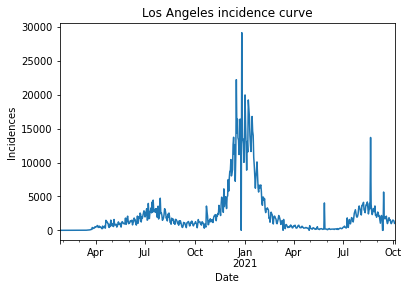

In [25]:
incdf = incdf.set_index(['county','date'])
plotLA = incdf.loc['Los Angeles']['incidences'].plot(title='Los Angeles incidence curve')
plotLA.set_xlabel("Date")
plotLA.set_ylabel("Incidences")



#plot created for incidence curve for county with highest peak (Los Angeles)

#### Question 6: Plot a vertical bar graph with County as the category and the peak incidence as the measure.

Text(0, 0.5, 'Incidences')

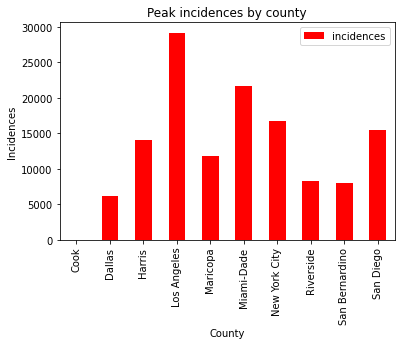

In [26]:
peaks_df = peaks_df.reset_index()
peaks_df = peaks_df.set_index('county')
peakInc = peaks_df[['incidences']].plot.bar(color=['red'], title='Peak incidences by county')
peakInc.set_xlabel("County")
peakInc.set_ylabel("Incidences")

#Vertical bar graph with county as category and peak incidence as measure